> ### Ad Parnassum (1932) – Masterpiece of Paul Klee
![](https://learnodo-newtonic.com/wp-content/uploads/2014/02/Ad-Parnassum-1932-by-Paul-Klee.webp)

## Objective:

**Develop an algorithm which will identify the artist when provided with a painting, with state of the art precision.**

### Approach to the solution:

#### Data processing:

* There are paintings of 50 artists in the dataset. However only 11 artists have more than 200 paintings available here.

* To reduce computation and better training, I decided to use the paintings of these 11 artists only.

* Since this is an imbalanced datset (Van Gogh has 877 paintings whereas Marc Chagall has only 239), class_weight is important. Infact, it improved model performance substantially.

* I used Keras ImageDataGenerator for data augmentation. This is not a traditional object detection problem, hence the augmentation approch should be used very carefully.

#### Modelling and Training:

* Use Convolutional Neural Network based approach, with a pre-defined architecture as baseline.

* I tried multiple architectures, however ResNet50 worked well so far.

* Pretrained weights on imagenet helped the model train better.

* The objective is to identify artist and not objects in the images. So the model should understand the style of the image better rather than the final output. Hence, training of shallow layers is more important than the deeper layers.
 
* The above statement is based on my understanding of the problem and experiments and observations.
 
* Training the model for more iterations might improve the performance, at the cost of computation resource.

#### Predictions:

* The final model could identify the artists with an approximate accuracy of 99% on training set and 85% on cross-validation set.

## 0.DATA PREPROCESSING

In [1]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.models import Model,Sequential
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Dense,Dropout,Flatten
import os
import json
from tqdm import tqdm, tqdm_notebook
import random
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from numpy.random import seed
seed(1)
tf.random.set_seed(1)

Using TensorFlow backend.


In [2]:
artists=pd.read_csv("../input/best-artworks-of-all-time/artists.csv")
artists.shape

(50, 8)

In [3]:
artists

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,Salvador Domingo Felipe Jacinto Dalí i Domènec...,http://en.wikipedia.org/wiki/Salvador_Dalí,139
6,6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,Édouard Manet (US: ; UK: ; French: [edwaʁ manɛ...,http://en.wikipedia.org/wiki/Édouard_Manet,90
7,7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,"Andrei Rublev (Russian: Андре́й Рублёв, IPA: [...",http://en.wikipedia.org/wiki/Andrei_Rublev,99
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877
9,9,Gustav Klimt,1862 - 1918,"Symbolism,Art Nouveau",Austrian,"Gustav Klimt (July 14, 1862 – February 6, 1918...",http://en.wikipedia.org/wiki/Gustav_Klimt,117


In [4]:
artists.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


In [5]:
artists.tail()

,id,name,years,genre,nationality,bio,wikipedia,paintings
45,45,Andy Warhol,1928 – 1987,Pop Art,American,"Andy Warhol (; born Andrew Warhola; August 6, ...",https://en.wikipedia.org/wiki/Andy_Warhol,181
46,46,Paul Gauguin,1848 – 1903,"Symbolism,Post-Impressionism",French,"Eugène Henri Paul Gauguin (UK: , US: ; French:...",http://en.wikipedia.org/wiki/Paul_Gauguin,311
47,47,Raphael,1483 – 1520,High Renaissance,Italian,Raffaello Sanzio da Urbino (Italian: [raffaˈɛl...,https://en.wikipedia.org/wiki/Raphael,109
48,48,Michelangelo,1475 – 1564,High Renaissance,Italian,Michelangelo di Lodovico Buonarroti Simoni or ...,https://en.wikipedia.org/wiki/Michelangelo,49
49,49,Jackson Pollock,1912 – 1956,Abstract Expressionism,American,"Paul Jackson Pollock (; January 28, 1912 – Aug...",http://en.wikipedia.org/wiki/Jackson_Pollock,24


In [6]:
artists_year = pd.DataFrame(artists.years.str.split(' ',2).tolist(),columns = ['birth','-','death'])
artists_year.drop(["-"],axis=1,inplace=True)
artists["birth"]=artists_year.birth
artists["death"]=artists_year.death

In [7]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
id             50 non-null int64
name           50 non-null object
years          50 non-null object
genre          50 non-null object
nationality    50 non-null object
bio            50 non-null object
wikipedia      50 non-null object
paintings      50 non-null int64
birth          50 non-null object
death          50 non-null object
dtypes: int64(2), object(8)
memory usage: 4.0+ KB


In [8]:
artists["birth"]=artists["birth"].apply(lambda x: int(x))
artists["death"]=artists["death"].apply(lambda x: int(x))

In [9]:
artists["age"]=artists.death-artists.birth

In [10]:
artists.age.describe()

count    50.00000
mean     64.78000
std      16.74087
min      32.00000
25%      55.25000
50%      65.50000
75%      77.50000
max      98.00000
Name: age, dtype: float64

In [11]:
artists['age']=artists['age']
bins=[30,55,65,77,98]
labels=["young adult","early adult","adult","senior"]
artists['age_group']=pd.cut(artists['age'],bins,labels=labels)

In [12]:
artists = artists.sort_values(by=["age"], ascending=False)
artists['rank']=tuple(zip(artists.age))
artists['rank']=artists.groupby('age',sort=False)['rank'].apply(lambda x : pd.Series(pd.factorize(x)[0])).values
artists.drop(["rank"],axis=1,inplace=True)
artists.reset_index(inplace=True,drop=True)
artists.head()
# Sort artists by number of paintings
artists = artists.sort_values(by=['paintings'], ascending=False)

# Create a dataframe with artists having more than 200 paintings
artists_top = artists[artists['paintings'] >= 200].reset_index()
artists_top = artists_top[['name', 'paintings']]
#artists_top['class_weight'] = max(artists_top.paintings)/artists_top.paintings
artists_top['class_weight'] = artists_top.paintings.sum() / (artists_top.shape[0] * artists_top.paintings)
artists_top

,name,paintings,class_weight
0,Vincent van Gogh,877,0.445631
1,Edgar Degas,702,0.556721
2,Pablo Picasso,439,0.890246
3,Pierre-Auguste Renoir,336,1.163149
4,Albrecht Dürer,328,1.191519
5,Paul Gauguin,311,1.256650
6,Francisco Goya,291,1.343018
7,Rembrandt,262,1.491672
8,Alfred Sisley,259,1.508951
9,Titian,255,1.532620


In [13]:
# Set class weights - assign higher weights to underrepresented classes
class_weights = artists_top['class_weight'].to_dict()
class_weights

{0: 0.44563076604125634,
 1: 0.5567210567210568,
 2: 0.8902464278318493,
 3: 1.1631493506493507,
 4: 1.1915188470066518,
 5: 1.2566501023092662,
 6: 1.3430178069353327,
 7: 1.491672449687717,
 8: 1.5089505089505089,
 9: 1.532620320855615,
 10: 1.6352225180677062}

In [14]:
updated_name = "Albrecht_Dürer".replace("_", " ")
artists_top.iloc[4, 0] = updated_name
artists_top

,name,paintings,class_weight
0,Vincent van Gogh,877,0.445631
1,Edgar Degas,702,0.556721
2,Pablo Picasso,439,0.890246
3,Pierre-Auguste Renoir,336,1.163149
4,Albrecht Dürer,328,1.191519
5,Paul Gauguin,311,1.256650
6,Francisco Goya,291,1.343018
7,Rembrandt,262,1.491672
8,Alfred Sisley,259,1.508951
9,Titian,255,1.532620


In [15]:
artists.sample(5)

,id,name,years,genre,nationality,bio,wikipedia,paintings,birth,death,age,age_group
36,9,Gustav Klimt,1862 - 1918,"Symbolism,Art Nouveau",Austrian,"Gustav Klimt (July 14, 1862 – February 6, 1918...",http://en.wikipedia.org/wiki/Gustav_Klimt,117,1862,1918,56,early adult
16,43,Piet Mondrian,1872 – 1944,Neoplasticism,Dutch,"Pieter Cornelis Mondriaan, after 1906 Piet Mon...",https://en.wikipedia.org/wiki/Piet_Mondrian,84,1872,1944,72,adult
24,40,Henri Rousseau,1844 – 1910,Primitivism,French,Henri Julien Félix Rousseau (French: [ɑ̃ʁi ʒyl...,https://en.wikipedia.org/wiki/Henri_Rousseau,70,1844,1910,66,adult
5,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73,1840,1926,86,senior
1,13,Pablo Picasso,1881 - 1973,Cubism,Spanish,Pablo Ruiz Picasso (; Spanish: [ˈpaβlo piˈkaso...,http://en.wikipedia.org/wiki/Pablo_Picasso,439,1881,1973,92,senior


In [16]:
artists.describe()

,id,paintings,birth,death,age
count,50.00000,50.000000,50.000000,50.000000,50.00000
mean,24.50000,168.920000,1737.820000,1802.600000,64.78000
std,14.57738,157.451105,187.213693,188.773377,16.74087
min,0.00000,24.000000,1266.000000,1337.000000,32.00000
25%,12.25000,81.000000,1572.500000,1620.500000,55.25000
50%,24.50000,123.000000,1839.500000,1902.000000,65.50000
75%,36.75000,191.750000,1871.250000,1943.000000,77.50000
max,49.00000,877.000000,1928.000000,1989.000000,98.00000


In [17]:
artists.isnull().sum()

id             0
name           0
years          0
genre          0
nationality    0
bio            0
wikipedia      0
paintings      0
birth          0
death          0
age            0
age_group      0
dtype: int64

In [18]:
artists.nunique()

id             50
name           50
years          50
genre          31
nationality    17
bio            50
wikipedia      50
paintings      48
birth          48
death          45
age            37
age_group       4
dtype: int64

In [19]:
# Explore images of top artists
images_dir = '/kaggle/input/best-artworks-of-all-time/images/images/'
artists_dirs = os.listdir(images_dir)
artists_top_name = artists_top['name'].str.replace(' ', '_').values
print(artists_top_name)

# See if all directories exist
for name in artists_top_name:
    if os.path.exists(os.path.join(images_dir, name)):
        print("Found -->", os.path.join(images_dir, name))
    else:
        print("Did not find -->", os.path.join(images_dir, name))

['Vincent_van_Gogh' 'Edgar_Degas' 'Pablo_Picasso' 'Pierre-Auguste_Renoir'
 'Albrecht_Dürer' 'Paul_Gauguin' 'Francisco_Goya' 'Rembrandt'
 'Alfred_Sisley' 'Titian' 'Marc_Chagall']
Found --> /kaggle/input/best-artworks-of-all-time/images/images/Vincent_van_Gogh
Found --> /kaggle/input/best-artworks-of-all-time/images/images/Edgar_Degas
Found --> /kaggle/input/best-artworks-of-all-time/images/images/Pablo_Picasso
Found --> /kaggle/input/best-artworks-of-all-time/images/images/Pierre-Auguste_Renoir
Found --> /kaggle/input/best-artworks-of-all-time/images/images/Albrecht_Dürer
Found --> /kaggle/input/best-artworks-of-all-time/images/images/Paul_Gauguin
Found --> /kaggle/input/best-artworks-of-all-time/images/images/Francisco_Goya
Found --> /kaggle/input/best-artworks-of-all-time/images/images/Rembrandt
Found --> /kaggle/input/best-artworks-of-all-time/images/images/Alfred_Sisley
Found --> /kaggle/input/best-artworks-of-all-time/images/images/Titian
Found --> /kaggle/input/best-artworks-of-

## 1.DATA VISUALISATION

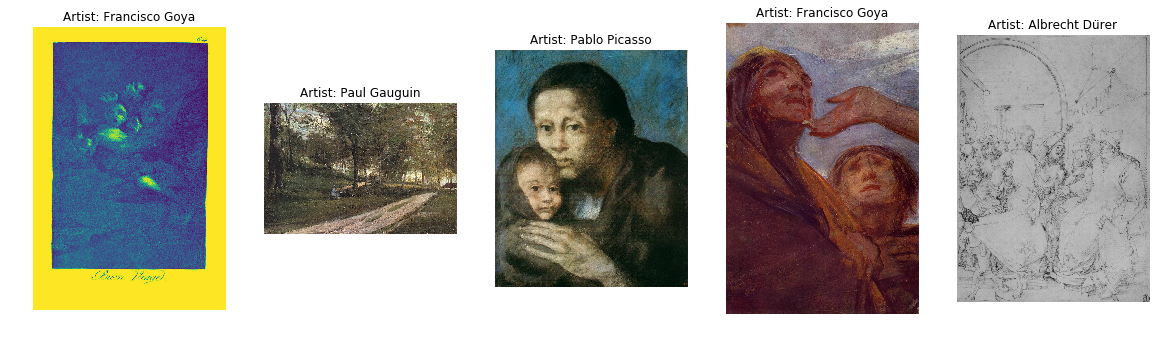

In [20]:
# Print few random paintings
n = 5
fig, axes = plt.subplots(1, n, figsize=(20,10))

for i in range(n):
    random_artist = random.choice(artists_top_name)
    random_image = random.choice(os.listdir(os.path.join(images_dir, random_artist)))
    random_image_file = os.path.join(images_dir, random_artist, random_image)
    image = plt.imread(random_image_file)
    axes[i].imshow(image)
    axes[i].set_title("Artist: " + random_artist.replace('_', ' '))
    axes[i].axis('off')

plt.show()

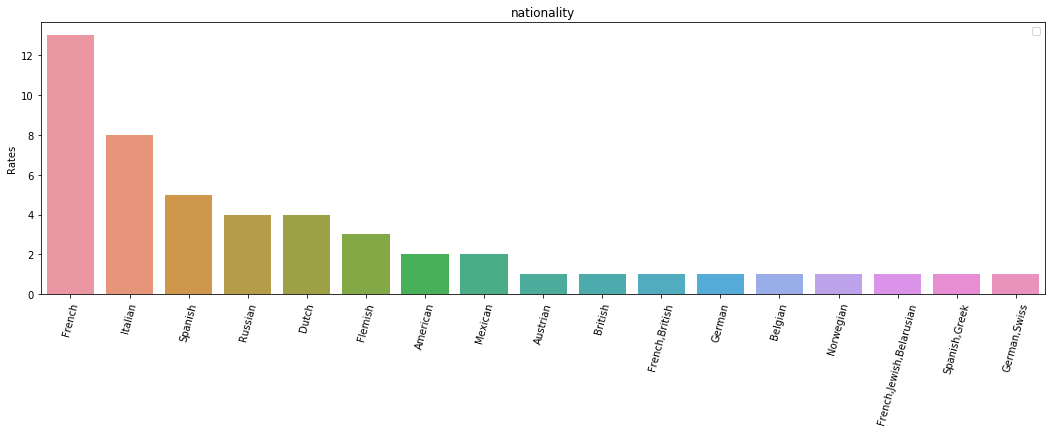

In [21]:
plt.figure(figsize=(18,5))

sns.barplot(x=artists['nationality'].value_counts().index,y=artists['nationality'].value_counts().values)
plt.title('nationality')
plt.xticks(rotation=75)
plt.ylabel('Rates')
plt.legend(loc=0)
plt.show()

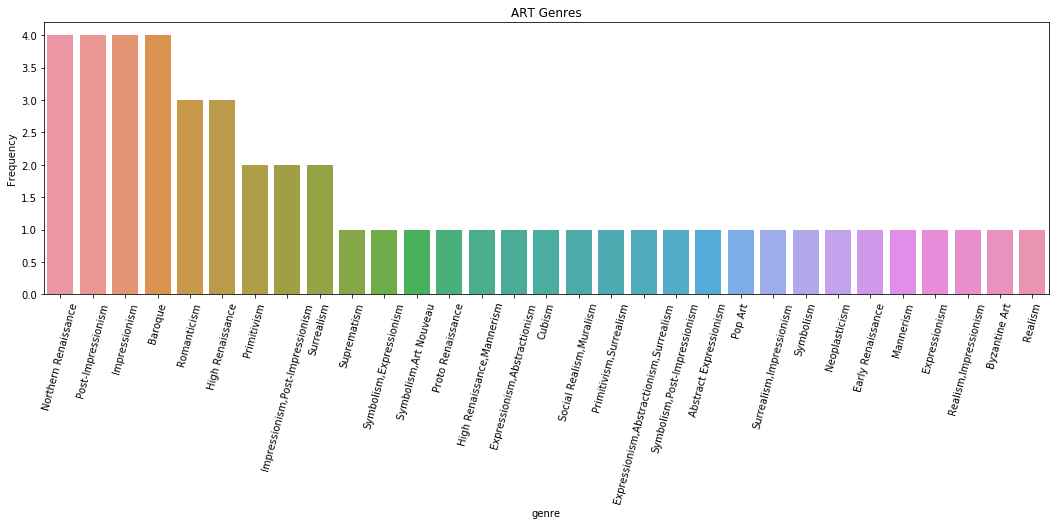

In [22]:
plt.figure(figsize=(18,5))
sns.barplot(x=artists['genre'].value_counts().index,
              y=artists['genre'].value_counts().values)
plt.xlabel('genre')
plt.xticks(rotation=75)
plt.ylabel('Frequency')
plt.title('ART Genres')
plt.show()

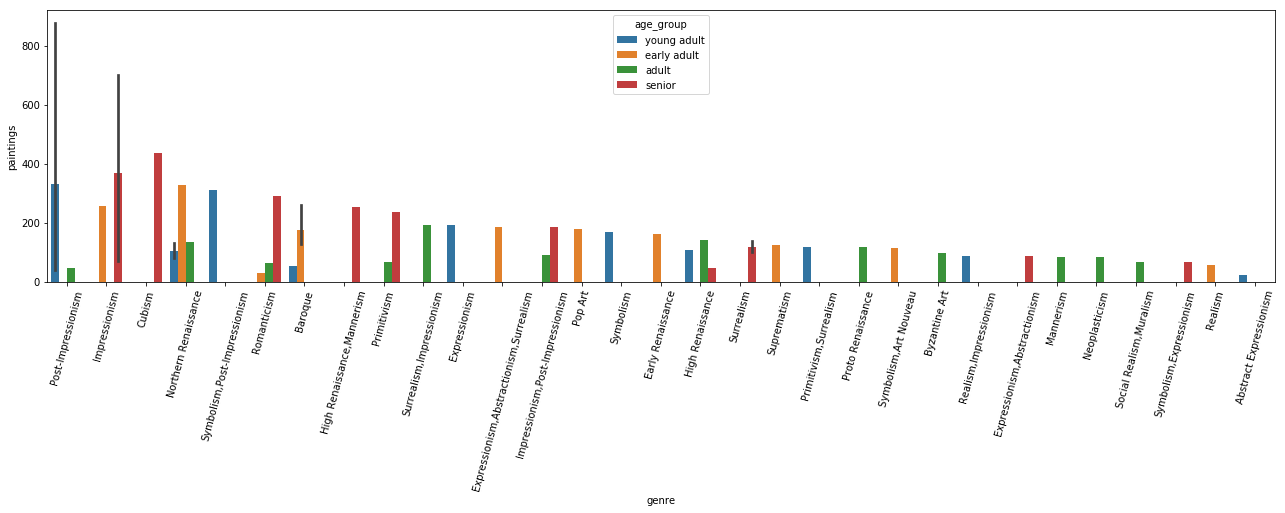

In [23]:
plt.figure(figsize=(22,5))
sns.barplot(x = "genre", y = "paintings", hue = "age_group", data = artists)
plt.xticks(rotation=75)
plt.show()

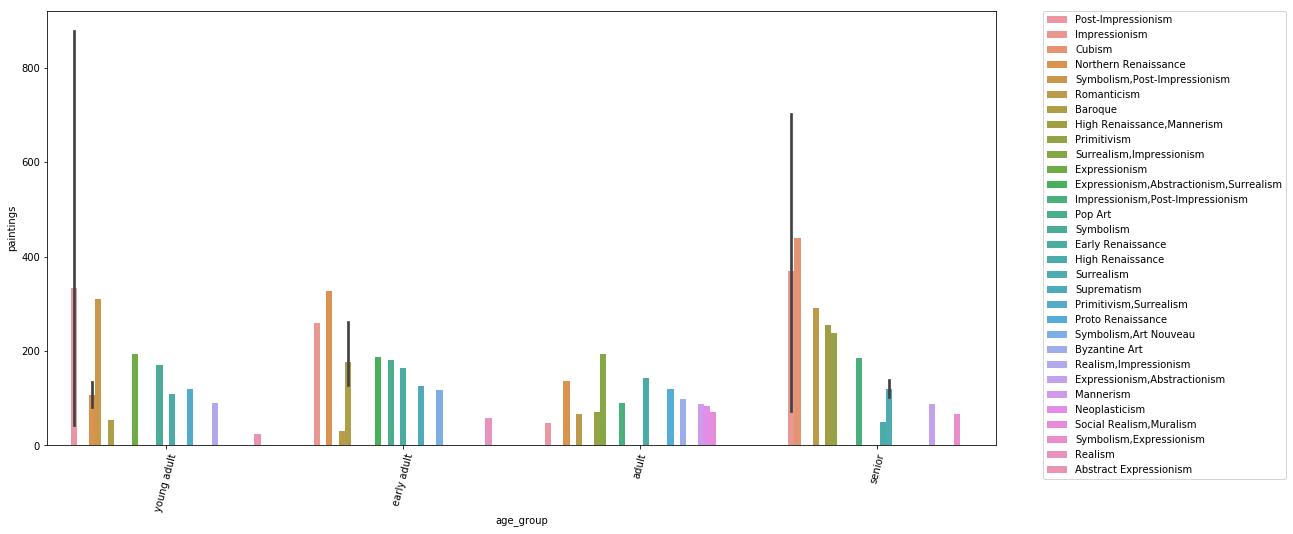

In [24]:
plt.figure(figsize=(17,8))
sns.barplot(x = "age_group", y = "paintings", hue = "genre", data = artists)
plt.xticks(rotation=75)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

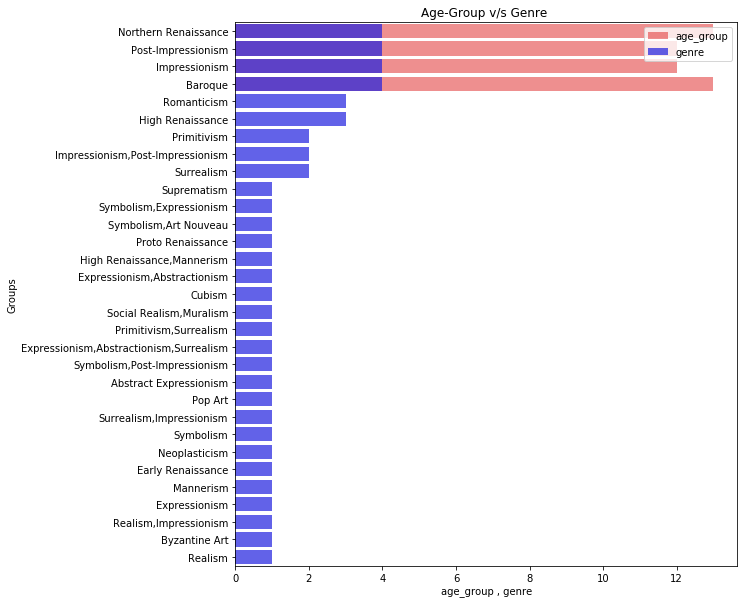

In [25]:
f,ax=plt.subplots(figsize=(9,10))
sns.barplot(x=artists['age_group'].value_counts().values,y=artists['age_group'].value_counts().index,alpha=0.5,color='red',label='age_group')
sns.barplot(x=artists['genre'].value_counts().values,y=artists['genre'].value_counts().index,color='blue',alpha=0.7,label='genre')
ax.legend(loc='upper right',frameon=True)
ax.set(xlabel='age_group , genre',ylabel='Groups',title="Age-Group v/s Genre ")
plt.show()

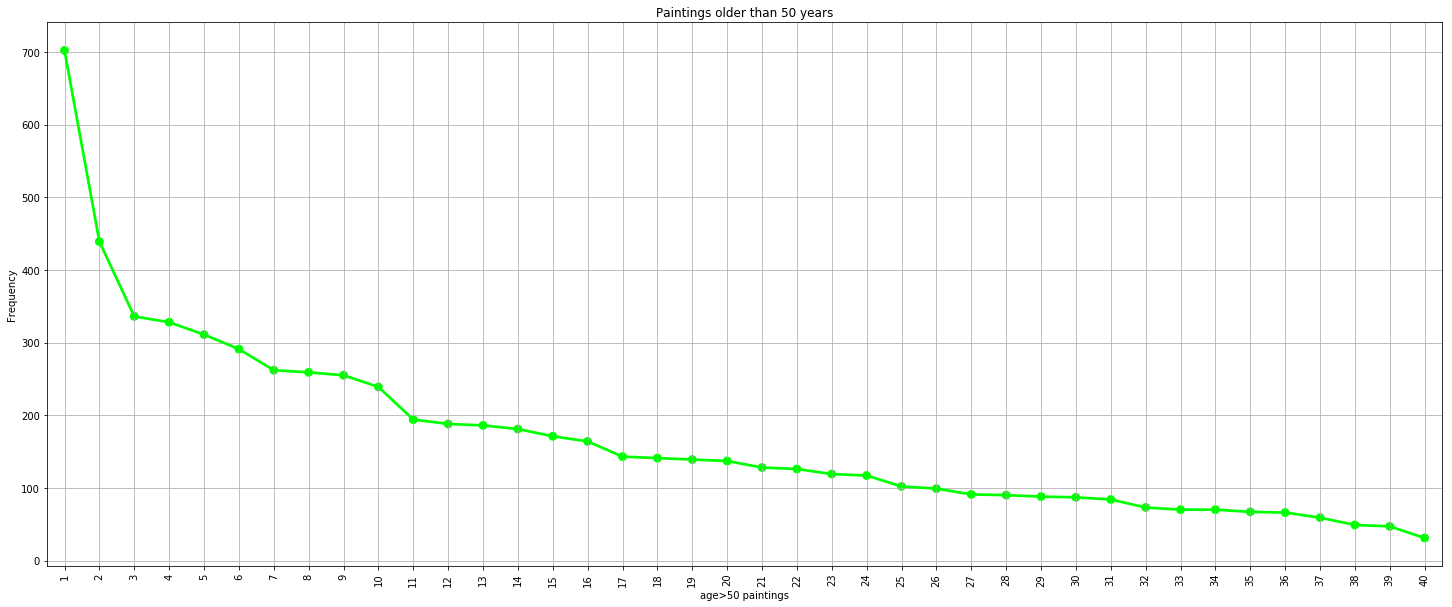

In [26]:
artists['age'].unique()
len(artists[(artists['age']>50)].paintings)
f,ax1=plt.subplots(figsize=(25,10))
sns.pointplot(x=np.arange(1,41),y=artists[(artists['age']>50)].paintings,color='lime',alpha=0.8)

plt.xlabel('age>50 paintings')
plt.ylabel('Frequency')
plt.title('Paintings older than 50 years')
plt.xticks(rotation=90)
plt.grid()
plt.show()

<Figure size 720x720 with 0 Axes>

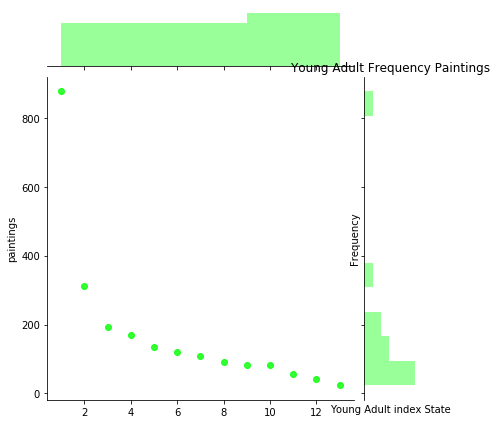

In [27]:
plt.figure(figsize=(10,10))
sns.jointplot(x=np.arange(1,14),y=artists[(artists['age_group']=='young adult')].paintings,color='lime',alpha=0.8)
plt.xlabel('Young Adult index State')
plt.ylabel('Frequency')
plt.title('Young Adult Frequency Paintings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 720x720 with 0 Axes>

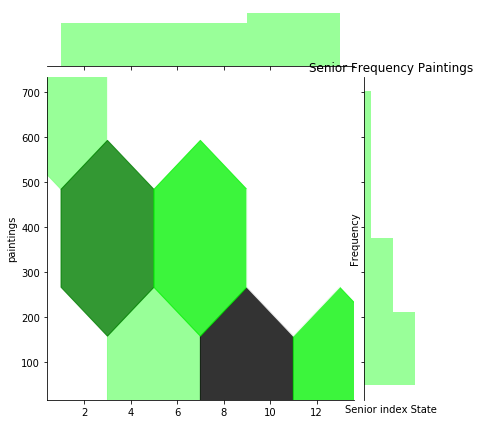

In [28]:
plt.figure(figsize=(10,10))
sns.jointplot(x=np.arange(1,14),y=artists[(artists['age_group']=='senior')].paintings,color='lime',kind='hex',alpha=0.8)
plt.xlabel('Senior index State')
plt.ylabel('Frequency')
plt.title('Senior Frequency Paintings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [29]:
artists.age_group.unique()

[young adult, senior, early adult, adult]
Categories (4, object): [young adult < early adult < adult < senior]

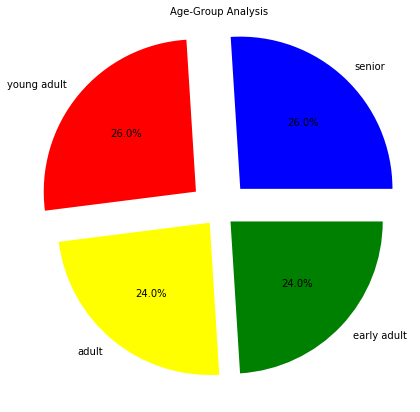

In [30]:
labels=artists['age_group'].value_counts().index
colors=['blue','red','yellow','green']
explode=[0.2,0.2,0.1,0.1,]
values=artists['age_group'].value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Age-Group Analysis',color='black',fontsize=10)
plt.show()

<Figure size 1080x504 with 0 Axes>

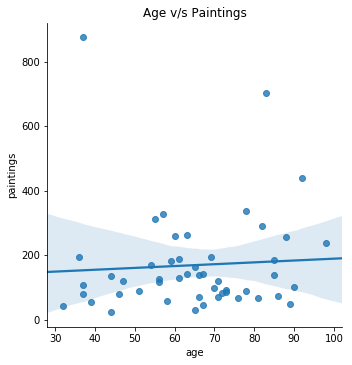

In [31]:
plt.figure(figsize=(15,7))
sns.lmplot(x='age',y='paintings',data=artists)
plt.xlabel('age')
plt.ylabel('paintings')
plt.title('Age v/s Paintings')
plt.show()

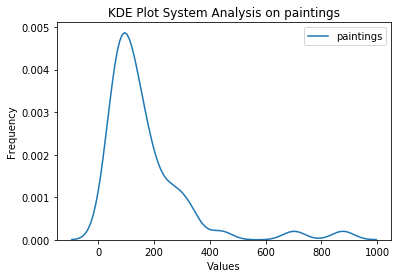

In [32]:
sns.kdeplot(artists['paintings'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('KDE Plot System Analysis on paintings')
plt.show()

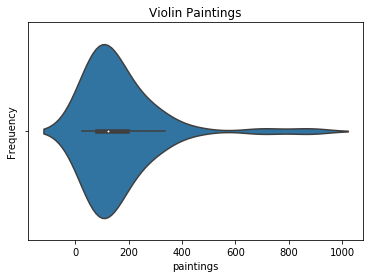

In [33]:
sns.violinplot(artists['paintings'])
plt.xlabel('paintings')
plt.ylabel('Frequency')
plt.title('Violin Paintings')
plt.show()

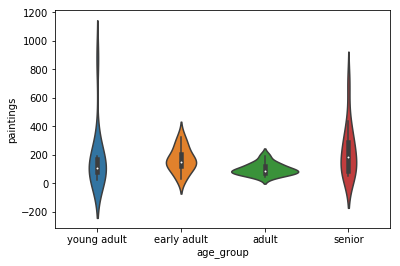

In [34]:
sns.violinplot(x=artists['age_group'],y=artists['paintings'])
plt.show()

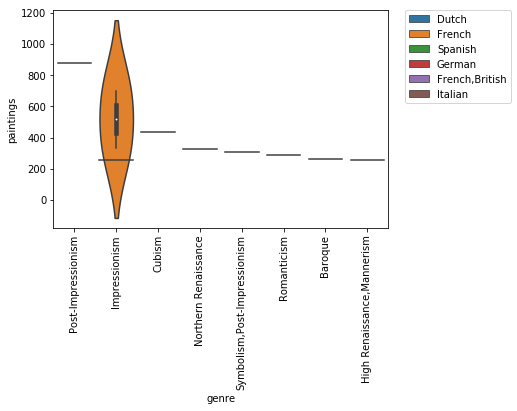

In [35]:
sns.violinplot(artists['genre'][:10],artists['paintings'][:10],hue=artists['nationality'][:10],dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=90)
plt.show()

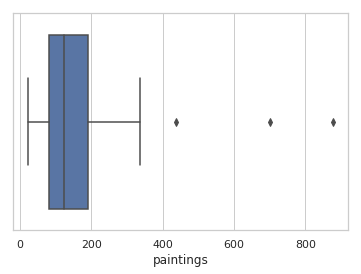

In [36]:
sns.set(style='whitegrid')
sns.boxplot(artists['paintings'])
plt.show()

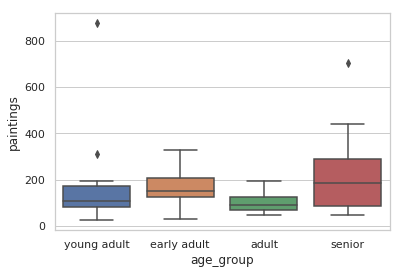

In [37]:
sns.boxplot(x=artists['age_group'],y=artists['paintings'])
plt.show()

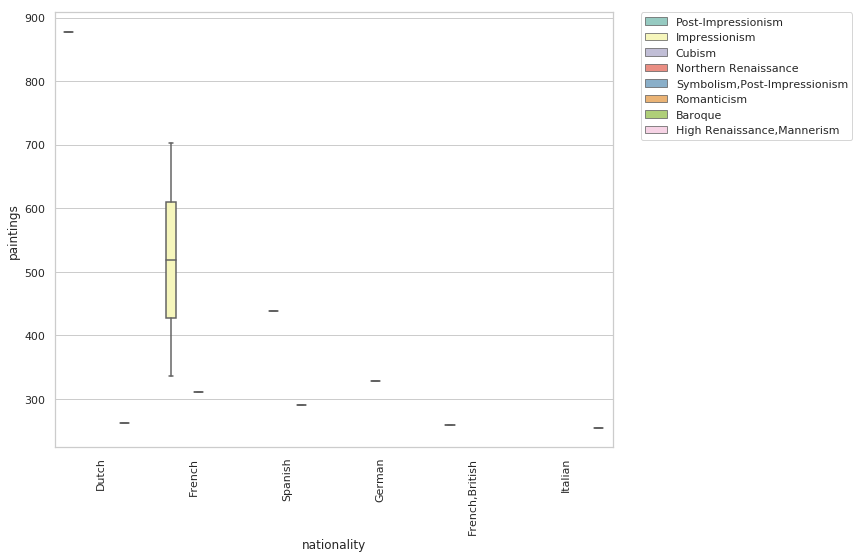

In [38]:
plt.figure(figsize=(10,8))
sns.boxplot(x=artists['nationality'][:10],y=artists['paintings'][:10],hue=artists['genre'][:10],palette="Set3")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

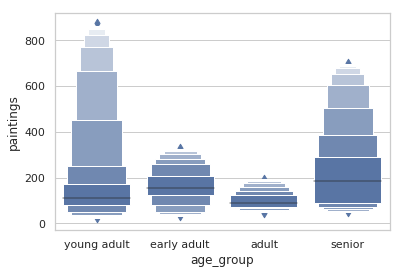

In [39]:
sns.boxenplot(x="age_group", y="paintings",
              color="b",
              scale="linear", data=artists)
plt.show()

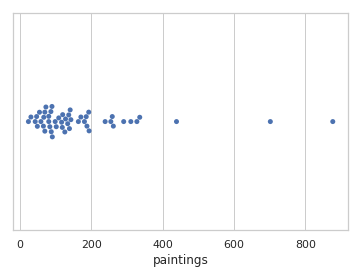

In [40]:
sns.set(style='whitegrid')
sns.swarmplot(x=artists['paintings'])
plt.show()

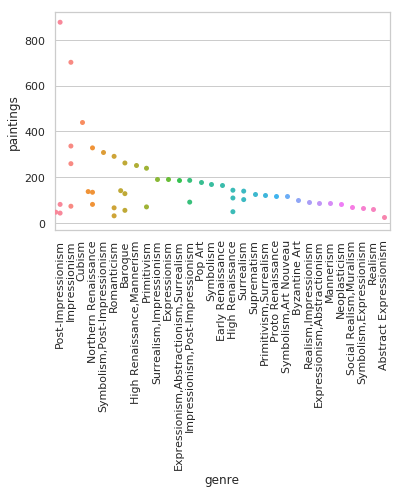

In [41]:
sns.swarmplot(x=artists['genre'],y=artists['paintings'])
plt.xticks(rotation=90)
plt.show()

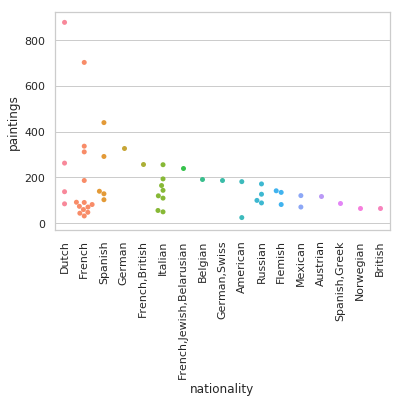

In [42]:
sns.swarmplot(x=artists['nationality'],y=artists['paintings'])
plt.xticks(rotation=90)
plt.show()

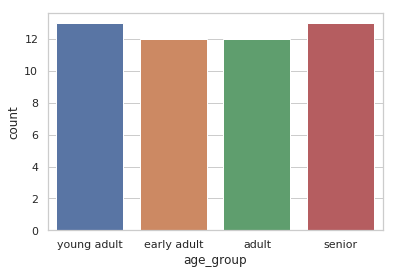

In [43]:
sns.countplot(artists['age_group'])
plt.show()

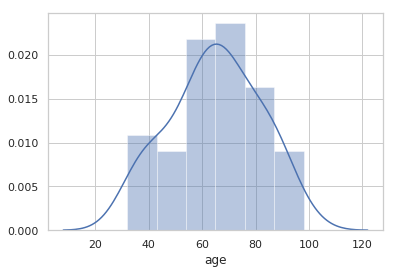

In [44]:
ax = sns.distplot(artists['age'])
plt.show()

In [45]:
artists[artists.age>85]

,id,name,years,genre,nationality,bio,wikipedia,paintings,birth,death,age,age_group
1,13,Pablo Picasso,1881 - 1973,Cubism,Spanish,Pablo Ruiz Picasso (; Spanish: [ˈpaβlo piˈkaso...,http://en.wikipedia.org/wiki/Pablo_Picasso,439,1881,1973,92,senior
4,32,Titian,1488 - 1576,"High Renaissance,Mannerism",Italian,Tiziano Vecelli or Tiziano Vecellio (pronounce...,http://en.wikipedia.org/wiki/Titian,255,1488,1576,88,senior
0,22,Marc Chagall,1887 - 1985,Primitivism,"French,Jewish,Belarusian",Marc Zakharovich Chagall ( shə-GAHL; born Mois...,http://en.wikipedia.org/wiki/Marc_Chagall,239,1887,1985,98,senior
2,44,Joan Miro,1893 – 1983,Surrealism,Spanish,Joan Miró i Ferrà (; Catalan: [ʒuˈam miˈɾo j f...,https://en.wikipedia.org/wiki/Joan_Miró,102,1893,1983,90,senior
5,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73,1840,1926,86,senior
3,48,Michelangelo,1475 – 1564,High Renaissance,Italian,Michelangelo di Lodovico Buonarroti Simoni or ...,https://en.wikipedia.org/wiki/Michelangelo,49,1475,1564,89,senior


In [46]:
x=artists[artists.age>60].groupby('nationality')['paintings'].count().reset_index()
x

,nationality,paintings
0,Belgian,1
1,British,1
2,Dutch,3
3,Flemish,1
4,French,8
5,"French,Jewish,Belarusian",1
6,"German,Swiss",1
7,Italian,5
8,Mexican,1
9,Norwegian,1


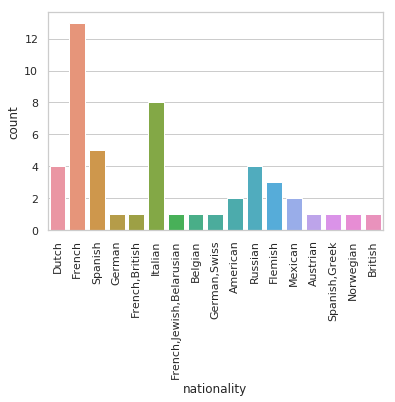

In [47]:
sns.countplot(artists['nationality'])
plt.xticks(rotation=90)
plt.show()

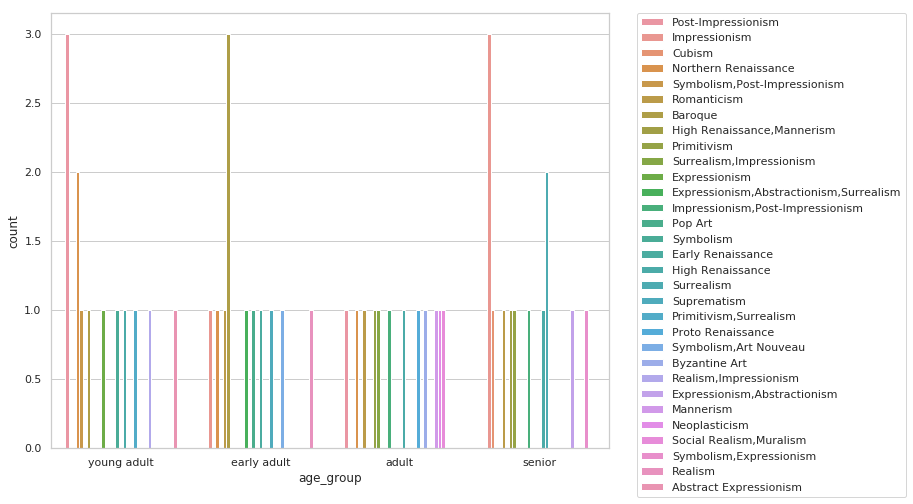

In [48]:
plt.figure(figsize=(10,8))
sns.countplot(artists['age_group'],hue=artists['genre'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

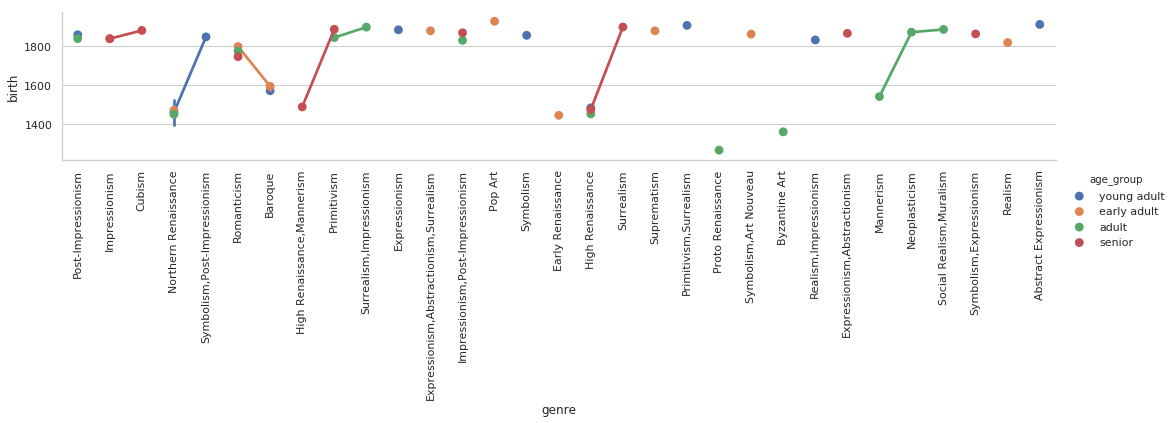

In [49]:
sns.factorplot(x="genre", y="birth", hue="age_group", data=artists,size=3, aspect=5)
plt.xticks(rotation=90)
plt.show()

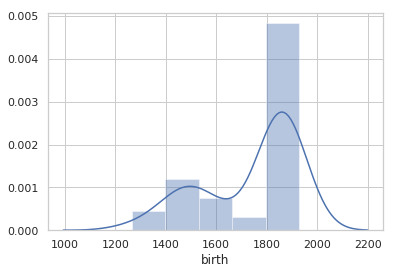

In [50]:
ax = sns.distplot(artists['birth'])
plt.show()

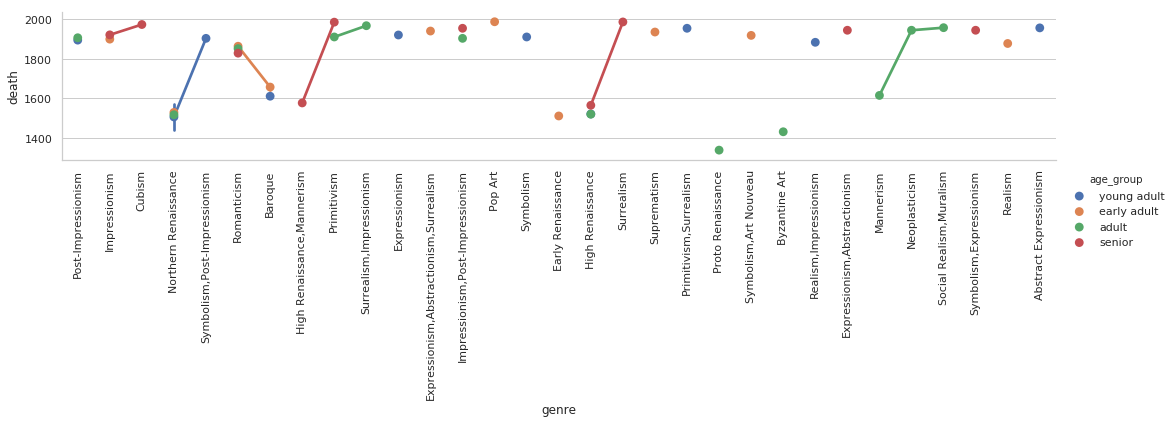

In [51]:
sns.factorplot(x="genre", y="death", hue="age_group", data=artists,size=3, aspect=5)
plt.xticks(rotation=90)
plt.show()

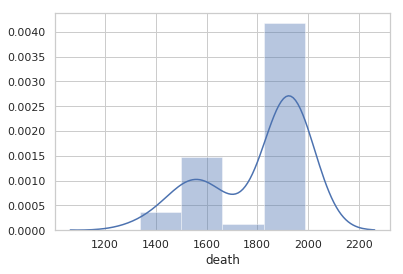

In [52]:
ax = sns.distplot(artists['death'])
plt.show()

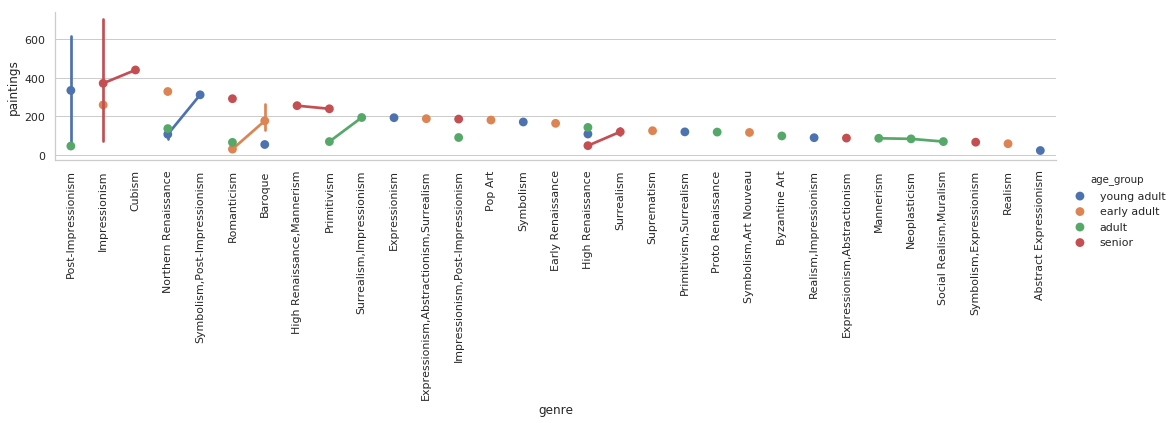

In [53]:
sns.factorplot(x="genre", y="paintings", hue="age_group", data=artists,size=3, aspect=5)
plt.xticks(rotation=90)
plt.show()

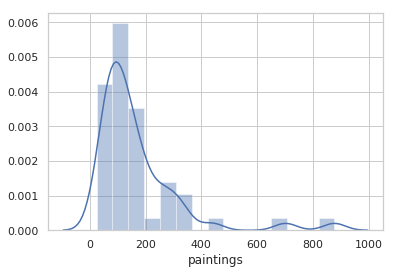

In [54]:
ax = sns.distplot(artists['paintings'])
plt.show()

In [55]:
artists[artists['paintings']>750]

,id,name,years,genre,nationality,bio,wikipedia,paintings,birth,death,age,age_group
47,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877,1853,1890,37,young adult


### 2.MODELLING

In [56]:
# Augment data
batch_size = 64
train_input_shape = (224, 224, 3)
n_classes = artists_top.shape[0]

train_datagen = ImageDataGenerator(validation_split=0.2,
                                   rescale=1./255.,
                                   zoom_range=0.7,
                                  )

train_generator = train_datagen.flow_from_directory(directory=images_dir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="training",
                                                    shuffle=True,
                                                    classes=artists_top_name.tolist()
                                                   )

valid_generator = train_datagen.flow_from_directory(directory=images_dir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="validation",
                                                    shuffle=True,
                                                    classes=artists_top_name.tolist()
                                                   )

STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
print("Total number of batches =", STEP_SIZE_TRAIN, "and", STEP_SIZE_VALID)

Found 3444 images belonging to 11 classes.
Found 855 images belonging to 11 classes.
Total number of batches = 53 and 13


In [57]:
random_artist = random.choice(artists_top_name)
random_image = random.choice(os.listdir(os.path.join(images_dir, random_artist)))
random_image_file = os.path.join(images_dir, random_artist, random_image)

# Original image
image = plt.imread(random_image_file)
axes[0].imshow(image)
axes[0].set_title("An original Image of " + random_artist.replace('_', ' '))
axes[0].axis('off')

# Transformed image
aug_image = train_datagen.random_transform(image)
axes[1].imshow(aug_image)
axes[1].set_title("A transformed Image of " + random_artist.replace('_', ' '))
axes[1].axis('off')

plt.show()

In [58]:
# Load pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=train_input_shape)

for layer in base_model.layers:
    layer.trainable = True

94773248/94765736 [==============================] - 1s 0us/step


In [59]:
# Add layers at the end
X = base_model.output
X = Flatten()(X)

X = Dense(512, kernel_initializer='he_uniform')(X)
#X = Dropout(0.5)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

X = Dense(16, kernel_initializer='he_uniform')(X)
#X = Dropout(0.5)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

output = Dense(n_classes, activation='softmax')(X)

model = Model(inputs=base_model.input, outputs=output)

In [60]:
optimizer = Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

In [61]:
n_epoch = 20

early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1, 
                           mode='auto', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, 
                              verbose=1, mode='auto')

In [62]:
# Train the model - all layers
history1 = model.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator, validation_steps=STEP_SIZE_VALID,
                              epochs=n_epoch,
                              shuffle=True,
                              verbose=1,
                              callbacks=[reduce_lr],
                              use_multiprocessing=True,
                              workers=16,
                              class_weight=class_weights
                             )

Epoch 1/20
53/53 [==============================] - 143s 3s/step - loss: 1.7271 - accuracy: 0.4290 - val_loss: 2.7848 - val_accuracy: 0.0589
Epoch 2/20
53/53 [==============================] - 132s 2s/step - loss: 1.1510 - accuracy: 0.7340 - val_loss: 2.6961 - val_accuracy: 0.0601
Epoch 3/20
53/53 [==============================] - 131s 2s/step - loss: 1.0614 - accuracy: 0.7737 - val_loss: 2.5064 - val_accuracy: 0.0649
Epoch 4/20
53/53 [==============================] - 133s 3s/step - loss: 0.9391 - accuracy: 0.8249 - val_loss: 2.4633 - val_accuracy: 0.1106
Epoch 5/20
53/53 [==============================] - 132s 2s/step - loss: 0.8539 - accuracy: 0.8676 - val_loss: 2.5386 - val_accuracy: 0.0685
Epoch 6/20
53/53 [==============================] - 132s 2s/step - loss: 0.7979 - accuracy: 0.8897 - val_loss: 2.6050 - val_accuracy: 0.0709
Epoch 7/20
53/53 [==============================] - 133s 3s/step - loss: 0.7240 - accuracy: 0.9160 - val_loss: 2.6045 - val_accuracy: 0.0661
Epoch 8/20
53

In [63]:
# Freeze core ResNet layers and train again 
for layer in model.layers[-6:]:
    layer.trainable = False

for layer in model.layers:
    layer.trainable = True

optimizer = Adam(lr=0.0001)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

n_epoch = 25
history2 = model.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator, validation_steps=STEP_SIZE_VALID,
                              epochs=n_epoch,
                              shuffle=True,
                              verbose=1,
                              callbacks=[reduce_lr, early_stop],
                              use_multiprocessing=True,
                              workers=16,
                              class_weight=class_weights
                             )

Epoch 1/25
53/53 [==============================] - 155s 3s/step - loss: 0.6154 - accuracy: 0.9370 - val_loss: 1.3400 - val_accuracy: 0.6947
Epoch 1/25
Epoch 2/25
53/53 [==============================] - 154s 3s/step - loss: 0.5789 - accuracy: 0.9444 - val_loss: 1.0971 - val_accuracy: 0.7716
Epoch 3/25
53/53 [==============================] - 153s 3s/step - loss: 0.5430 - accuracy: 0.9476 - val_loss: 1.1299 - val_accuracy: 0.7644
Epoch 4/25
53/53 [==============================] - 154s 3s/step - loss: 0.5043 - accuracy: 0.9533 - val_loss: 1.1102 - val_accuracy: 0.7536
Epoch 5/25
53/53 [==============================] - 155s 3s/step - loss: 0.5056 - accuracy: 0.9515 - val_loss: 1.0094 - val_accuracy: 0.8101
Epoch 6/25
53/53 [==============================] - 152s 3s/step - loss: 0.4548 - accuracy: 0.9624 - val_loss: 1.1049 - val_accuracy: 0.7536
Epoch 7/25
53/53 [==============================] - 152s 3s/step - loss: 0.4270 - accuracy: 0.9636 - val_loss: 0.9172 - val_accuracy: 0.8185
Ep

In [64]:
history = {}
history['loss'] = history1.history['loss'] + history2.history['loss']
history['acc'] = history1.history['accuracy'] + history2.history['accuracy']
history['val_loss'] = history1.history['val_loss'] + history2.history['val_loss']
history['val_acc'] = history1.history['val_accuracy'] + history2.history['val_accuracy']
history['lr'] = history1.history['lr'] + history2.history['lr']

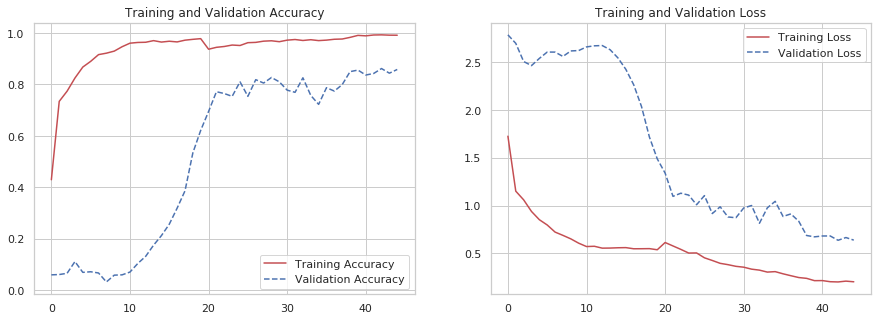

In [65]:
def plot_training(history):
    acc = history['acc']
    val_acc = history['val_acc']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(len(acc))

    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    
    axes[0].plot(epochs, acc, 'r-', label='Training Accuracy')
    axes[0].plot(epochs, val_acc, 'b--', label='Validation Accuracy')
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].legend(loc='best')

    axes[1].plot(epochs, loss, 'r-', label='Training Loss')
    axes[1].plot(epochs, val_loss, 'b--', label='Validation Loss')
    axes[1].set_title('Training and Validation Loss')
    axes[1].legend(loc='best')
    
    plt.show()
    
plot_training(history)

In [66]:
# Prediction accuracy on train data
score = model.evaluate_generator(train_generator)
print("Prediction accuracy on train data =", score[1])

Prediction accuracy on train data = 0.9965157


In [67]:
# Prediction accuracy on CV data
score = model.evaluate_generator(valid_generator)
print("Prediction accuracy on CV data =", score[1])

Prediction accuracy on CV data = 0.8561404


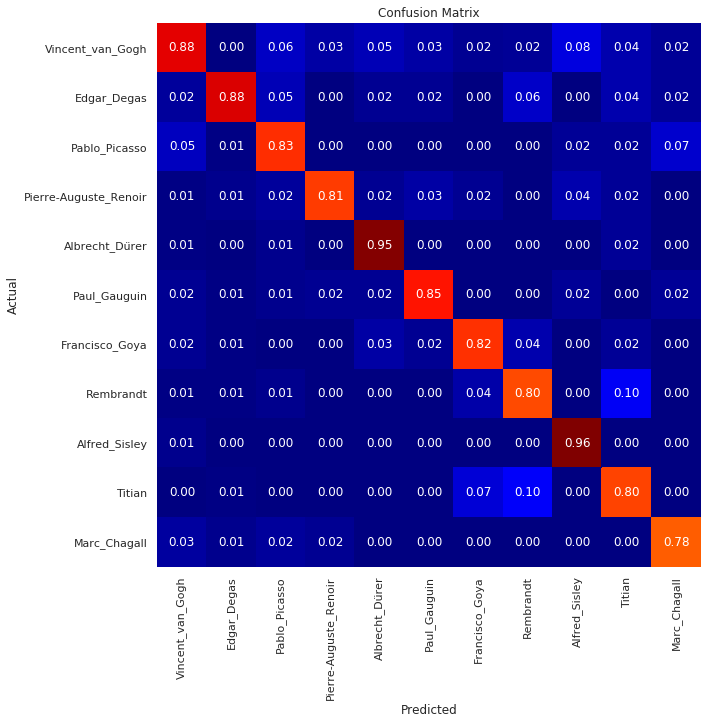

Classification Report:
                       precision    recall  f1-score   support

     Vincent_van_Gogh       0.84      0.88      0.85       168
          Edgar_Degas       0.93      0.88      0.91       137
        Pablo_Picasso       0.82      0.83      0.82        87
Pierre-Auguste_Renoir       0.93      0.81      0.87        64
      Albrecht_Dürer       0.88      0.95      0.92        64
         Paul_Gauguin       0.90      0.85      0.87        61
       Francisco_Goya       0.85      0.82      0.84        56
            Rembrandt       0.78      0.80      0.79        49
        Alfred_Sisley       0.86      0.96      0.91        50
               Titian       0.76      0.80      0.78        51
         Marc_Chagall       0.85      0.78      0.81        45

             accuracy                           0.86       832
            macro avg       0.85      0.85      0.85       832
         weighted avg       0.86      0.86      0.86       832



In [68]:
# Classification report and confusion matrix
from sklearn.metrics import *
import seaborn as sns

tick_labels = artists_top_name.tolist()

def showClassficationReport_Generator(model, valid_generator, STEP_SIZE_VALID):
    # Loop on each generator batch and predict
    y_pred, y_true = [], []
    for i in range(STEP_SIZE_VALID):
        (X,y) = next(valid_generator)
        y_pred.append(model.predict(X))
        y_true.append(y)
    
    # Create a flat list for y_true and y_pred
    y_pred = [subresult for result in y_pred for subresult in result]
    y_true = [subresult for result in y_true for subresult in result]
    
    # Update Truth vector based on argmax
    y_true = np.argmax(y_true, axis=1)
    y_true = np.asarray(y_true).ravel()
    
    # Update Prediction vector based on argmax
    y_pred = np.argmax(y_pred, axis=1)
    y_pred = np.asarray(y_pred).ravel()
    
    # Confusion Matrix
    fig, ax = plt.subplots(figsize=(10,10))
    conf_matrix = confusion_matrix(y_true, y_pred, labels=np.arange(n_classes))
    conf_matrix = conf_matrix/np.sum(conf_matrix, axis=1)
    sns.heatmap(conf_matrix, annot=True, fmt=".2f", square=True, cbar=False, 
                cmap=plt.cm.jet, xticklabels=tick_labels, yticklabels=tick_labels,
                ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title('Confusion Matrix')
    plt.show()
    
    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=np.arange(n_classes), target_names=artists_top_name.tolist()))

showClassficationReport_Generator(model, valid_generator, STEP_SIZE_VALID)

ValueError: Error when checking input: expected input_1 to have 4 dimensions, but got array with shape (1, 224, 224)

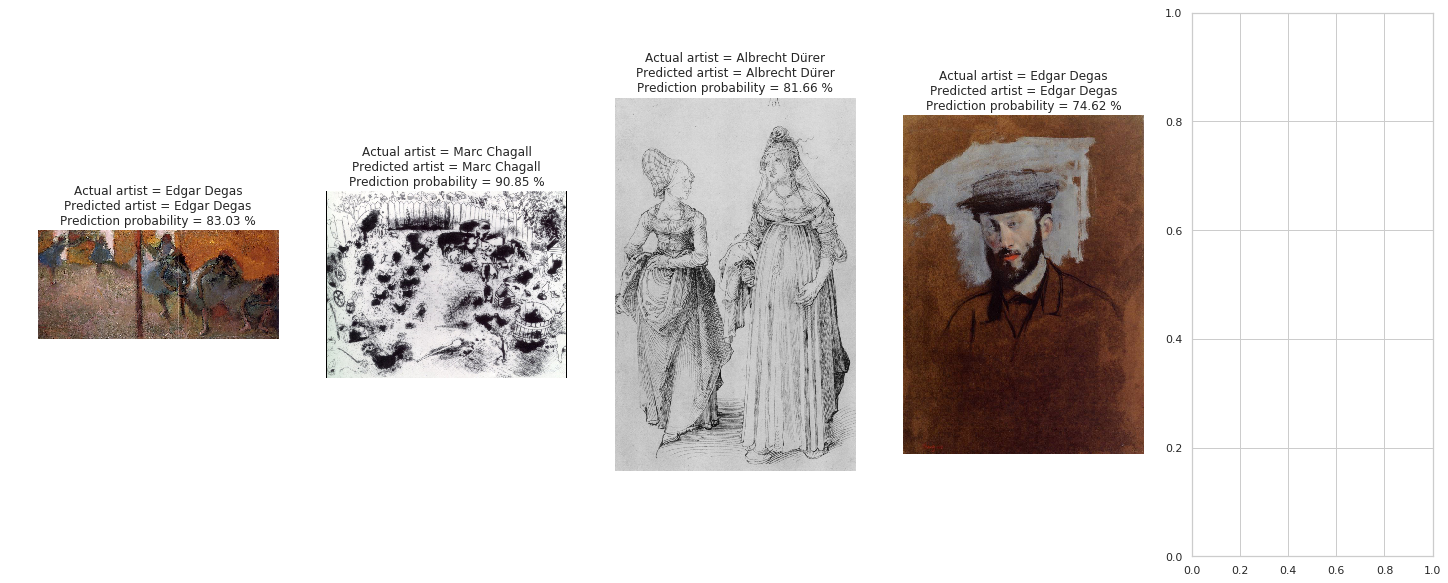

In [69]:
# Prediction
from keras.preprocessing import *
from PIL import Image

n = 5
fig, axes = plt.subplots(1, n, figsize=(25,10))

for i in range(n):
    random_artist = random.choice(artists_top_name)
    random_image = random.choice(os.listdir(os.path.join(images_dir, random_artist)))
    random_image_file = os.path.join(images_dir, random_artist, random_image)

    test_image = Image.open(random_image_file) 
    test_image = test_image.resize(train_input_shape[0:2])

    test_image = np.array(test_image)
    test_image = test_image / 255.0
    test_image = np.expand_dims(test_image, axis=0)

    prediction = model.predict(test_image)
    prediction_probability = np.amax(prediction)
    prediction_idx = np.argmax(prediction)

    labels = train_generator.class_indices
    labels = dict((v,k) for k,v in labels.items())

    title = "Actual artist = {}\nPredicted artist = {}\nPrediction probability = {:.2f} %" \
                .format(random_artist.replace('_', ' '), labels[prediction_idx].replace('_', ' '),
                        prediction_probability*100)

    axes[i].imshow(plt.imread(random_image_file))
    axes[i].set_title(title)
    axes[i].axis('off')

plt.show()